In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
%precision 3
%matplotlib inline

In [2]:
population = stats.norm(loc = 4, scale = 0.8) # 평균4 표준편차 0.8 모집단시뮬레이션

In [3]:
sample_mean_array = np.zeros(10000) # zeros 다음에 배열크기

In [4]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size =10) # 랜덤으로 표본추출
    sample_mean_array[i] = np.mean(sample)

In [5]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [6]:
np.mean(sample_mean_array)

4.004202422791747

In [7]:
np.std(sample_mean_array, ddof = 1)

0.2513580850860402

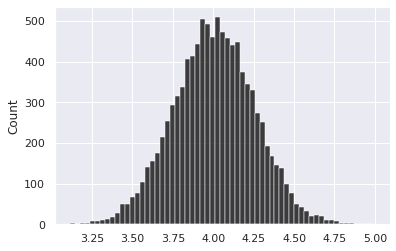

In [8]:
sns.histplot(sample_mean_array, color = 'black')

**3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다**

In [9]:
size_array = np.arange(start = 10, stop =100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [10]:
sample_mean_array_size = np.zeros(len(size_array))

In [11]:
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample_mean')

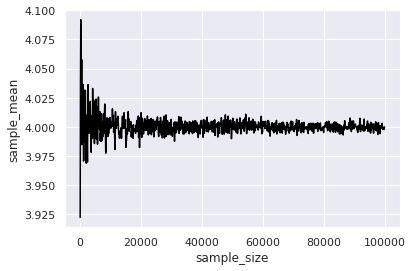

In [12]:
plt.plot(size_array, sample_mean_array_size, color = 'black')
plt.xlabel("sample_size")
plt.ylabel("sample_mean")

In [13]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [14]:
np.random.seed(1)
np.mean(calc_sample_mean(10, 10000))

4.004202422791747

In [15]:
np.random.seed(1)
#샘플사이즈 10

size_10 = calc_sample_mean(10, 10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size" : np.tile("size 10", 10000)})

#샘플사이즈 20

size_20 = calc_sample_mean(20, 10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size" : np.tile("size 20", 10000)})

#샘플사이즈 30

size_30 = calc_sample_mean(30, 10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size" : np.tile("size 30", 10000)})

#종합
sim_result  = pd. concat([size_10_df, size_20_df, size_30_df])

#결과표시
print(sim_result.head())
sim_result

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10
...,...,...
9995,3.980022,size 30
9996,3.770016,size 30
9997,3.930151,size 30
9998,4.075567,size 30


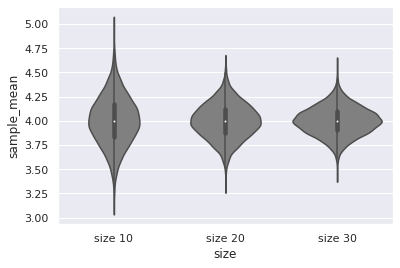

In [16]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color = 'gray') # x에 칼럼을 적어주면 칼럼별로 분리되고 y값도 명시해야함
# x,y 값을 명시하지 않으면 분리되지 않고 표시됨

**3.5.9 표본평균의 표준편차는 모집단보다 작다**

In [17]:
size_array  = np.arange(start = 2, stop = 102, step =2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [18]:
sample_mean_std_array = np.zeros(len(size_array))


In [19]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size = size_array[i], n_trial= 100)
    sample_mean_std_array[i] = np.std(sample_mean,ddof = 1)

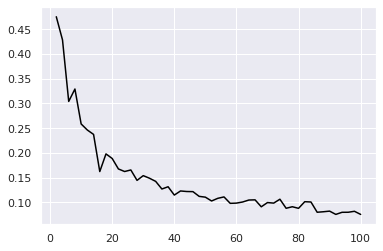

In [20]:
plt.plot(size_array, sample_mean_std_array,color ='black')

3.5.10 표준오차

In [21]:
standard_error = 0.8/np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std_value')

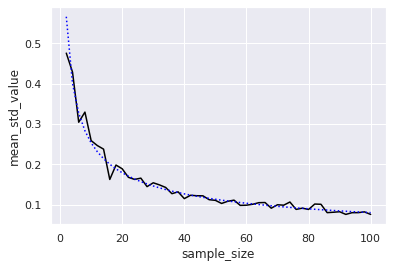

In [22]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.plot(size_array, standard_error, color = 'blue', linestyle = 'dotted')
plt.xlabel("sample_size")
plt.ylabel("mean_std_value")

3.5.12 표본분산의 평균값은 모분산과 차이가 있다
3.5.13 불편분산을 사용하면 편향이 사라진다

In [23]:
sample_var_array = np.zeros(10000)

In [24]:
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0) # ddof 자유도를 0으로 넣으면 분산을 과소평가하기떄문에 자유도를 1로 넣어서 보정함
    # 

<ipython-input-24-65424d015a61>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  sample_var_array[i] = sp.var(sample, ddof = 0) # ddof 자유도를 0으로 넣으면 분산을 과소평가하기떄문에 자유도를 1로 넣어서 보정함


In [25]:
np.mean(sample_var_array)

0.5746886877332101

3.5.14 샘플사이즈가 크면 불편분산은 모분산에 가까워진다

In [26]:
size_array = np.arange(start = 10, stop = 100100, step =100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [27]:
unbias_var_array_size = np.zeros(len(size_array))

In [28]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)

Text(0, 0.5, 'unbias var')

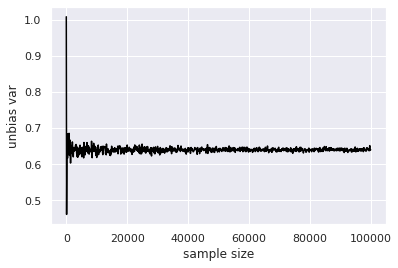

In [29]:
plt.plot(size_array, unbias_var_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

3.5.19 큰수의 법칙, 중심극한정리

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


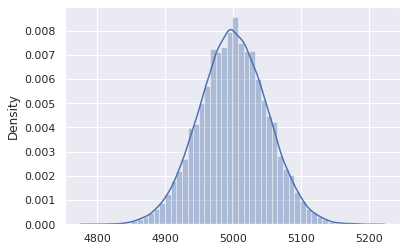

In [30]:
n_size = 10000
n_trial = 50000

coin = np.array([0,1])

count_coin = np.zeros(n_trial)

np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size = n_size, replace = True))

sns.distplot(count_coin)